<a href="https://colab.research.google.com/github/djhsgfjk/collab/blob/main/Lab_4_%D0%A0%D0%B5%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D0%A5%D0%B0%D1%84%D0%B0_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B8%D1%81%D0%BA%D0%B0_%D0%BB%D0%B8%D0%BD%D0%B8%D0%B9_%D0%B8_%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%BD%D0%BE%D1%81%D1%82%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from PIL import Image
from pylab import *
import random as rd

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

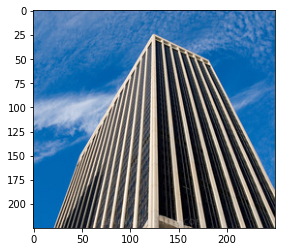

In [3]:
image = np.array(Image.open('/1.jpg'), dtype=int)
figure()
imshow(image)
show()

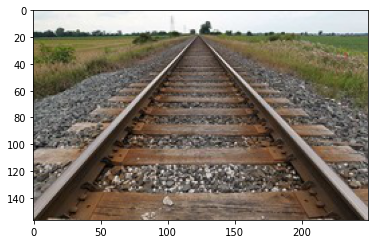

In [4]:
image2 = np.array(Image.open('/2.jpg'), dtype=int)
figure()
imshow(image2)
show()

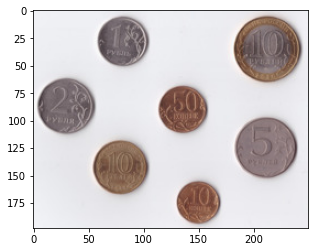

In [5]:
image3 = np.array(Image.open('/3.jpg'), dtype=int)
figure()
imshow(image3)
show()

0. Перевести изображение в полутоновое

In [6]:
def make_halftone_image(image):
  width = image.shape[0]
  height = image.shape[1]

  halftoneImage = np.zeros(width*height, dtype=int)
  halftoneImage.shape = (width, height)
  for i in range(width):
      for j in range(height):
          halftoneImage[i][j] = mean(image[i,j,:])
  
  return halftoneImage

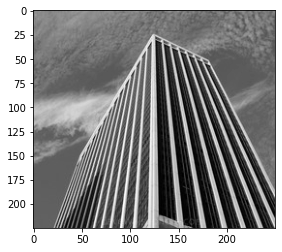

In [7]:
halftoneImage = make_halftone_image(image)
figure()
imshow(halftoneImage, cmap='gray', vmin=0, vmax=255)
show()

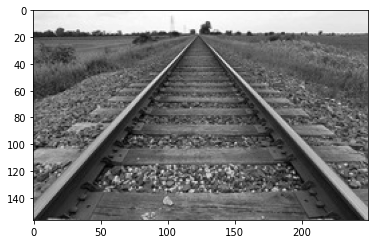

In [8]:
halftoneImage2 = make_halftone_image(image2)
figure()
imshow(halftoneImage2, cmap='gray', vmin=0, vmax=255)
show()

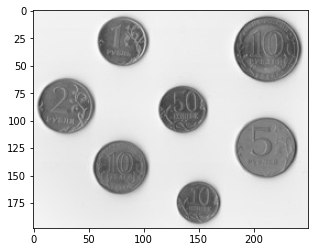

In [9]:
halftoneImage3 = make_halftone_image(image3)
figure()
imshow(halftoneImage3, cmap='gray', vmin=0, vmax=255)
show()

1. Размыть изображение фильтром Гаусса с небольшой дисперсией

In [10]:
def build_G(sigma2):
  const1 = 2*sigma2
  const2 = 2*np.pi*sigma2

  G = np.zeros(9, dtype=np.float64)
  G.shape = (3, 3)

  for i in range(3):
    for j in range(3):
      G[i, j] = np.power(np.e, -((i-3//2)**2 + (j-3//2)**2)/const1)/const2

  G /= np.sum(G)
  return G   

def Gaussian_filtering(image, sigma2):
  G = build_G(sigma2)

  width = image.shape[0]
  height = image.shape[1]

  gaussImage = np.zeros(width*height, dtype=int)
  gaussImage.shape = (width, height)

  imageCopy = np.zeros((width+1)*(height+1), dtype=int)
  imageCopy.shape = ((width+1),(height+1))


  for i in range(width):
      for j in range(height):
        imageCopy[i+1, j+1] = image[i, j]

  for i in range(1, width-1):
      for j in range(1, height-1):
        gaussImage[i, j] = np.sum(G * imageCopy[i-1:i+2, j-1:j+2])

  gaussImage = clip(gaussImage, 0, 255)     
  return gaussImage

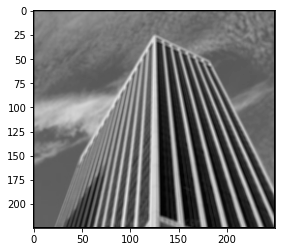

In [11]:
gaussImage = Gaussian_filtering(halftoneImage, 100)
figure()
imshow(gaussImage, cmap='gray', vmin=0, vmax=255)

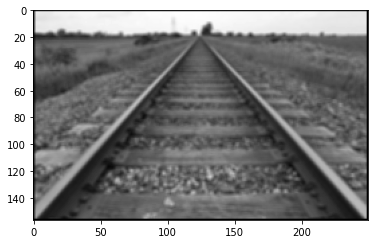

In [12]:
gaussImage2 = Gaussian_filtering(halftoneImage2, 100)
figure()
imshow(gaussImage2, cmap='gray', vmin=0, vmax=255)

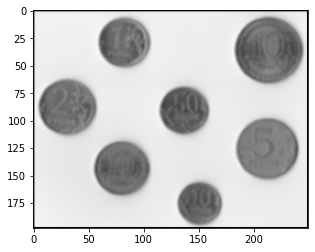

In [13]:
gaussImage3 = Gaussian_filtering(halftoneImage3, 100)
figure()
imshow(gaussImage3, cmap='gray', vmin=0, vmax=255)

2. Вычислить градиент изображения с помощью фильтра Собеля

In [14]:
def get_gradient(image):
  width = image.shape[0]
  height = image.shape[1]

  imageCopy = np.zeros((width+1, height+1), dtype=int)

  for i in range(width):
    for j in range(height):
      imageCopy[i+1, j+1] = image[i, j]

  gradient = np.zeros((width+1, height+1, 2), dtype=float)

  for i in range(1, width):
    for j in range(1, height):
      if imageCopy[i, j] > 0:
        gradient[i, j, 0] = (2*imageCopy[i+1, j]-2*imageCopy[i-1, j] + imageCopy[i+1, j-1]-imageCopy[i-1, j-1] + imageCopy[i+1, j+1]-imageCopy[i-1, j+1])/6
        gradient[i, j, 1] = (2*imageCopy[i, j+1]-2*imageCopy[i, j-1] + imageCopy[i-1, j+1]-imageCopy[i-1, j-1] + imageCopy[i+1, j+1]-imageCopy[i+1, j-1])/6

  return gradient[1:width+1, 1:height+1, :]

In [15]:
gradient = get_gradient(gaussImage)
print(gradient)

[[[  0.           0.        ]
  [  0.           0.        ]
  [  0.           0.        ]
  ...
  [  0.           0.        ]
  [  0.           0.        ]
  [  0.           0.        ]]

 [[  0.           0.        ]
  [ 52.5         53.16666667]
  [ 83.83333333  20.16666667]
  ...
  [ 75.5          1.16666667]
  [ 57.66666667 -44.        ]
  [  0.           0.        ]]

 [[  0.           0.        ]
  [ 17.          83.33333333]
  [ 27.          31.33333333]
  ...
  [ 22.66666667   3.33333333]
  [ 18.5        -68.16666667]
  [  0.           0.        ]]

 ...

 [[  0.           0.        ]
  [  0.16666667  64.5       ]
  [  0.5         21.83333333]
  ...
  [-21.33333333  39.66666667]
  [-24.33333333 -38.        ]
  [  0.           0.        ]]

 [[  0.           0.        ]
  [-37.5         48.5       ]
  [-59.16666667  16.5       ]
  ...
  [-43.83333333  21.83333333]
  [-44.5        -23.83333333]
  [  0.           0.        ]]

 [[  0.           0.        ]
  [  0.           0.    

In [16]:
gradient2 = get_gradient(gaussImage2)
print(gradient2)

[[[   0.            0.        ]
  [   0.            0.        ]
  [   0.            0.        ]
  ...
  [   0.            0.        ]
  [   0.            0.        ]
  [   0.            0.        ]]

 [[   0.            0.        ]
  [  92.16666667   92.16666667]
  [ 144.66666667   30.66666667]
  ...
  [ 154.5          -0.16666667]
  [ 115.66666667  -90.33333333]
  [   0.            0.        ]]

 [[   0.            0.        ]
  [  29.83333333  144.5       ]
  [  46.83333333   47.83333333]
  ...
  [  50.66666667   -0.33333333]
  [  38.         -141.66666667]
  [   0.            0.        ]]

 ...

 [[   0.            0.        ]
  [ -10.16666667   99.83333333]
  [ -24.83333333    8.16666667]
  ...
  [ -28.16666667   33.83333333]
  [ -13.16666667 -104.16666667]
  [   0.            0.        ]]

 [[   0.            0.        ]
  [ -62.16666667   68.16666667]
  [ -89.83333333   -2.5       ]
  ...
  [-103.5          33.16666667]
  [ -85.5         -70.5       ]
  [   0.            0.      

In [17]:
gradient3 = get_gradient(gaussImage3)
print(gradient3)

[[[   0.            0.        ]
  [   0.            0.        ]
  [   0.            0.        ]
  ...
  [   0.            0.        ]
  [   0.            0.        ]
  [   0.            0.        ]]

 [[   0.            0.        ]
  [  94.           94.        ]
  [ 147.83333333   31.5       ]
  ...
  [ 160.            0.        ]
  [ 120.          -93.33333333]
  [   0.            0.        ]]

 [[   0.            0.        ]
  [  31.5         147.83333333]
  [  49.5          49.5       ]
  ...
  [  53.33333333    0.        ]
  [  40.         -146.66666667]
  [   0.            0.        ]]

 ...

 [[   0.            0.        ]
  [   0.33333333  162.66666667]
  [   0.16666667   54.5       ]
  ...
  [   0.5           0.5       ]
  [   0.16666667 -158.5       ]
  [   0.            0.        ]]

 [[   0.            0.        ]
  [ -94.66666667  122.        ]
  [-149.           40.66666667]
  ...
  [-158.5           0.16666667]
  [-119.         -119.        ]
  [   0.            0.      

3. Вычислить магнитуду и направление градиента

In [18]:
def get_magn(gradient):
  width = gradient.shape[0]
  height = gradient.shape[1]

  magn = np.zeros((width, height), dtype=float)
  for i in range(width):
    for j in range(height):
      magn[i, j] = np.sqrt(gradient[i, j, 0]**2 + gradient[i, j, 1]**2)

  return magn

In [19]:
magn = get_magn(gradient)
print(magn)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.         74.71910361 86.2248353  ... 75.50901344 72.53581491
   0.        ]
 [ 0.         85.0496587  41.36154951 ... 22.9104537  70.63246027
   0.        ]
 ...
 [ 0.         64.50021533 21.83905777 ... 45.03948885 45.1232879
   0.        ]
 [ 0.         61.3066065  61.42429849 ... 48.96994543 50.48046927
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [20]:
magn2 = get_magn(gradient2)
print(magn2)

[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.         130.34335    147.88133381 ... 154.5000899  146.76133309
    0.        ]
 [  0.         147.54754413  66.94317657 ...  50.66776315 146.674621
    0.        ]
 ...
 [  0.         100.34966644  26.14170784 ...  44.02335239 104.99550255
    0.        ]
 [  0.          92.25718882  89.86811324 ... 108.68430327 110.8174174
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


In [34]:
magn3 = get_magn(gradient3)
print(magn3)

[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.         132.93607486 151.15205736 ... 160.         152.02339001
    0.        ]
 [  0.         151.15205736  70.00357134 ...  53.33333333 152.02339001
    0.        ]
 ...
 [  0.         162.6670082   54.50025484 ...   0.70710678 158.50008763
    0.        ]
 [  0.         154.42078156 154.44991997 ... 158.50008763 168.29141392
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


In [21]:
def get_dir(gradient):
  width = gradient.shape[0]
  height = gradient.shape[1]
  
  dir = np.zeros((width, height), dtype=float)

  for i in range(width):
    for j in range(height):
      if gradient[i, j, 1] == 0:
        dir[i, j] = 0
      elif gradient[i, j, 0] == 0:
        dir[i, j] = np.pi / 2
      else:
        dir[i, j] = np.arctan(gradient[i, j, 1] / gradient[i, j, 0])

  return dir

In [22]:
dir = get_dir(gradient)
print(dir)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.79170723  0.23607126 ...  0.01545131 -0.65177298
   0.        ]
 [ 0.          1.36955759  0.85954768 ...  0.14601226 -1.305786
   0.        ]
 ...
 [ 0.          1.56821235  1.54789957 ... -1.07735621  1.00123426
   0.        ]
 [ 0.         -0.91261438 -0.27196355 ... -0.46212554  0.49170524
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [23]:
dir2 = get_dir(gradient2)
print(dir2)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  7.85398163e-01  2.08889307e-01 ... -1.07874823e-03
  -6.63035198e-01  0.00000000e+00]
 [ 0.00000000e+00  1.36719792e+00  7.95961151e-01 ... -6.57885245e-03
  -1.30873002e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00 -1.46930979e+00 -3.17718318e-01 ... -8.76542782e-01
   1.44506311e+00  0.00000000e+00]
 [ 0.00000000e+00 -8.31401489e-01  2.78221326e-02 ... -3.10111895e-01
   6.89539016e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [24]:
dir3 = get_dir(gradient3)
print(dir3)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  7.85398163e-01  2.09938155e-01 ...  0.00000000e+00
  -6.61043169e-01  0.00000000e+00]
 [ 0.00000000e+00  1.36085817e+00  7.85398163e-01 ...  0.00000000e+00
  -1.30454428e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  1.56874715e+00  1.56773823e+00 ...  7.85398163e-01
  -1.56974480e+00  0.00000000e+00]
 [ 0.00000000e+00 -9.10889091e-01 -2.66441336e-01 ... -1.05152432e-03
   7.85398163e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


4. Округлить направление градиента до 8 направлений (0, 45, 90, 135, 180, 225, 270, 315)

In [25]:
def round_up(dir):
  new_dir = np.zeros_like(dir, dtype=int)

  dir = (dir * 180 / np.pi) % 360
  for i in range(dir.shape[0]):
    for j in range(dir.shape[1]):
      if dir[i, j] != 0:
        a = dir[i, j] // 45
        b = (dir[i, j] % 45) // 22.5
        new_dir[i, j] = (a+b)*45 % 360
  return new_dir

In [26]:
round_up_dir = round_up(dir)
print(round_up_dir)

[[  0   0   0 ...   0   0   0]
 [  0  45   0 ...   0 315   0]
 [  0  90  45 ...   0 270   0]
 ...
 [  0  90  90 ... 315  45   0]
 [  0 315   0 ... 315  45   0]
 [  0   0   0 ...   0   0   0]]


In [27]:
round_up_dir2 = round_up(dir2)
print(round_up_dir2)

[[  0   0   0 ...   0   0   0]
 [  0  45   0 ...   0 315   0]
 [  0  90  45 ...   0 270   0]
 ...
 [  0 270   0 ... 315  90   0]
 [  0 315   0 ...   0  45   0]
 [  0   0   0 ...   0   0   0]]


In [28]:
round_up_dir3 = round_up(dir3)
print(round_up_dir3)

[[  0   0   0 ...   0   0   0]
 [  0  45   0 ...   0 315   0]
 [  0  90  45 ...   0 270   0]
 ...
 [  0  90  90 ...  45 270   0]
 [  0 315   0 ...   0  45   0]
 [  0   0   0 ...   0   0   0]]


5. Применить процедуру подавление немаксимумов вдоль направления градиентов

In [29]:
def non_maximum_suppression(magn, dir):
  w = magn.shape[0]
  h = magn.shape[1]

  max = magn.max()

  magnCopy = np.ones((w+2, h+2), dtype=float)
  magnCopy *= max
  for i in range(1, w+1):
    for j in range(1, h+1):
      magnCopy[i, j] = magn[i-1, j-1]

  non_max = magn.copy()

  for i in range(1, w+1):
    for j in range(1, h+1):
      for k, x, y in [[0, 0, 1], [45, 1, 1], [90, 1, 0], [135, -1, 1]]:
        if dir[i-1, j-1] % 180 == k:
          if magnCopy[i, j] <= magnCopy[i+x, j+y] and magnCopy[i, j] <= magnCopy[i-x, j-y]:
            non_max[i-1, j-1] = 0
  
  return non_max    

In [30]:
non_max = non_maximum_suppression(magn, round_up_dir)
print(non_max.min(), non_max.max())
print(non_max)

0.0 143.83342989568024
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.         74.71910361 86.2248353  ... 75.50901344 72.53581491
   0.        ]
 [ 0.         85.0496587  41.36154951 ... 22.9104537   0.
   0.        ]
 ...
 [ 0.         64.50021533 21.83905777 ... 45.03948885 45.1232879
   0.        ]
 [ 0.         61.3066065  61.42429849 ... 48.96994543 50.48046927
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [31]:
non_max2 = non_maximum_suppression(magn2, round_up_dir2)
print(non_max2.min(), non_max2.max())
print(non_max2)

0.0 169.33333333333334
[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.         130.34335    147.88133381 ... 154.5000899  146.76133309
    0.        ]
 [  0.         147.54754413  66.94317657 ...   0.           0.
    0.        ]
 ...
 [  0.         100.34966644   0.         ...   0.           0.
    0.        ]
 [  0.          92.25718882  89.86811324 ... 108.68430327 110.8174174
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


In [35]:
non_max3 = non_maximum_suppression(magn3, round_up_dir3)
print(non_max3.min(), non_max3.max())
print(non_max3)

0.0 168.2914139223983
[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.         132.93607486 151.15205736 ... 160.         152.02339001
    0.        ]
 [  0.         151.15205736  70.00357134 ...   0.           0.
    0.        ]
 ...
 [  0.         162.6670082    0.         ...   0.70710678 158.50008763
    0.        ]
 [  0.         154.42078156 154.44991997 ... 158.50008763 168.29141392
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


6. Применить процедуру гистерезиса (уточнения границ) на основе 2-х границ

In [36]:
def hysteresis(magn, min, max):
  w = magn.shape[0]
  h = magn.shape[1]

  magnCopy = np.zeros((w+2, h+2), dtype=float)
  for i in range(1, w+1):
    for j in range(1, h+1):
      magnCopy[i, j] = magn[i-1, j-1]

  hyst = np.ones((w+2, h+2), dtype=int) * 3
  hyst[1:w+1, 1:h+1] -= 4

  next = []


  def cycle(i, j):
    for x, y in (np.argwhere(hyst[i-1:i+2, j-1:j+2] <= 0) -1):
      #print("hyst", hyst[x+i, y+j], x+i, y+j)
      if magnCopy[i+x, i+y] > min:
        hyst[i+x, i+y] = 2
        next.append([i+x, i+y])
      else:
        hyst[i+x, i+y] = 1


  i, j = np.argwhere(magnCopy[:, :] > max)[0]   
  hyst[i, j] = 2
  cycle(i, j)

  while hyst.min() == -1:
    if len(next) > 0:
      for i, j in next:
        if hyst[i, j] == -1:
          #print(i, j)
          if magnCopy[i, j] > max:
            hyst[i, j] = 2
            cycle(i, j)
          else:
            hyst[i, j] = 0
      next.clear()
    else:
      i, j = np.argwhere(hyst[:, :] == -1)[0]
      #print(i, j)
      if magnCopy[i, j] > max:
        hyst[i, j] = 2
        cycle(i, j)
      else:
        hyst[i, j] = 0
  
  return hyst[1:w+1, 1:h+1] // 2

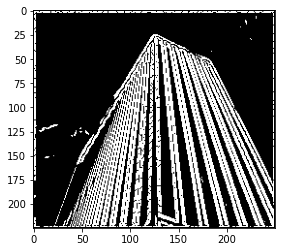

In [37]:
hyst = hysteresis(non_max, 15, 20) * 255
figure()
imshow(hyst, cmap='gray', vmin=0, vmax=255)

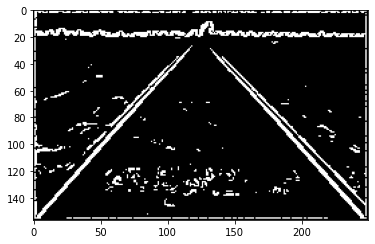

In [38]:
hyst2 = hysteresis(non_max2, 20, 30) * 255
figure()
imshow(hyst2, cmap='gray', vmin=0, vmax=255)

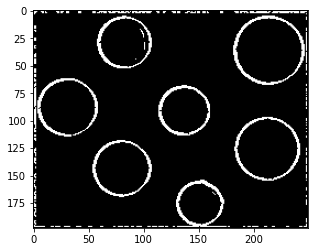

In [39]:
hyst3 = hysteresis(non_max3, 15, 30) * 255
figure()
imshow(hyst3, cmap='gray', vmin=0, vmax=255)

Вычислим градиент для видимых значений полученных изображений

In [40]:
binaryGradient = get_gradient(hyst)
print(binaryGradient)

[[[   0.     0. ]
  [   0.     0. ]
  [   0.     0. ]
  ...
  [   0.     0. ]
  [   0.     0. ]
  [   0.     0. ]]

 [[   0.     0. ]
  [ 127.5  127.5]
  [ 127.5  -42.5]
  ...
  [  85.     0. ]
  [  42.5 -127.5]
  [   0.     0. ]]

 [[   0.     0. ]
  [ -42.5  127.5]
  [-127.5 -127.5]
  ...
  [-127.5   42.5]
  [   0.     0. ]
  [   0.     0. ]]

 ...

 [[   0.     0. ]
  [   0.   170. ]
  [  42.5 -127.5]
  ...
  [   0.    85. ]
  [   0.  -170. ]
  [   0.     0. ]]

 [[   0.     0. ]
  [-127.5  127.5]
  [-127.5  -42.5]
  ...
  [-127.5   42.5]
  [-127.5 -127.5]
  [   0.     0. ]]

 [[   0.     0. ]
  [   0.     0. ]
  [   0.     0. ]
  ...
  [   0.     0. ]
  [   0.     0. ]
  [   0.     0. ]]]


In [41]:
binaryGradient2 = get_gradient(hyst2)
print(binaryGradient2)

[[[   0.     0. ]
  [   0.     0. ]
  [   0.     0. ]
  ...
  [   0.     0. ]
  [   0.     0. ]
  [   0.     0. ]]

 [[   0.     0. ]
  [ 127.5  127.5]
  [ 127.5  -42.5]
  ...
  [  42.5  -42.5]
  [   0.   -85. ]
  [   0.     0. ]]

 [[   0.     0. ]
  [   0.   170. ]
  [ -42.5 -127.5]
  ...
  [   0.     0. ]
  [   0.     0. ]
  [   0.     0. ]]

 ...

 [[   0.     0. ]
  [  42.5   42.5]
  [   0.     0. ]
  ...
  [   0.     0. ]
  [   0.     0. ]
  [   0.     0. ]]

 [[   0.     0. ]
  [ -85.    85. ]
  [ -85.     0. ]
  ...
  [ -42.5  -42.5]
  [   0.   -85. ]
  [   0.     0. ]]

 [[   0.     0. ]
  [   0.     0. ]
  [   0.     0. ]
  ...
  [   0.     0. ]
  [   0.     0. ]
  [   0.     0. ]]]


In [42]:
binaryGradient3 = get_gradient(hyst3)
print(binaryGradient3)

[[[   0.     0. ]
  [   0.     0. ]
  [   0.     0. ]
  ...
  [   0.     0. ]
  [   0.     0. ]
  [   0.     0. ]]

 [[   0.     0. ]
  [ 127.5  127.5]
  [ 127.5  -42.5]
  ...
  [  42.5  -42.5]
  [   0.   -85. ]
  [   0.     0. ]]

 [[   0.     0. ]
  [ -42.5  127.5]
  [-127.5 -127.5]
  ...
  [   0.     0. ]
  [   0.     0. ]
  [   0.     0. ]]

 ...

 [[   0.     0. ]
  [  85.    85. ]
  [   0.     0. ]
  ...
  [   0.     0. ]
  [  42.5  -42.5]
  [   0.     0. ]]

 [[   0.     0. ]
  [ -85.    85. ]
  [ -42.5  -42.5]
  ...
  [ -42.5   42.5]
  [ -85.   -85. ]
  [   0.     0. ]]

 [[   0.     0. ]
  [   0.     0. ]
  [   0.     0. ]
  ...
  [   0.     0. ]
  [   0.     0. ]
  [   0.     0. ]]]


Находим магнитуду и направление градиента

In [43]:
binaryMagn = get_magn(binaryGradient)
print(binaryMagn)

[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.         180.3122292  134.39680056 ...  85.         134.39680056
    0.        ]
 [  0.         134.39680056 180.3122292  ... 134.39680056   0.
    0.        ]
 ...
 [  0.         170.         134.39680056 ...  85.         170.
    0.        ]
 [  0.         180.3122292  134.39680056 ... 134.39680056 180.3122292
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


In [44]:
binaryMagn2 = get_magn(binaryGradient2)
print(binaryMagn2)

[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.         180.3122292  134.39680056 ...  60.1040764   85.
    0.        ]
 [  0.         170.         134.39680056 ...   0.           0.
    0.        ]
 ...
 [  0.          60.1040764    0.         ...   0.           0.
    0.        ]
 [  0.         120.2081528   85.         ...  60.1040764   85.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


In [45]:
binaryMagn3 = get_magn(binaryGradient3)
print(binaryMagn3)

[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.         180.3122292  134.39680056 ...  60.1040764   85.
    0.        ]
 [  0.         134.39680056 180.3122292  ...   0.           0.
    0.        ]
 ...
 [  0.         120.2081528    0.         ...   0.          60.1040764
    0.        ]
 [  0.         120.2081528   60.1040764  ...  60.1040764  120.2081528
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


In [46]:
binaryDir = get_dir(binaryGradient)
print(binaryDir)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.78539816 -0.32175055 ...  0.         -1.24904577
   0.        ]
 [ 0.         -1.24904577  0.78539816 ... -0.32175055  0.
   0.        ]
 ...
 [ 0.          1.57079633 -1.24904577 ...  1.57079633  1.57079633
   0.        ]
 [ 0.         -0.78539816  0.32175055 ... -0.32175055  0.78539816
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [47]:
binaryDir2 = get_dir(binaryGradient2)
print(binaryDir2)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.78539816 -0.32175055 ... -0.78539816  1.57079633
   0.        ]
 [ 0.          1.57079633  1.24904577 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.78539816  0.         ...  0.          0.
   0.        ]
 [ 0.         -0.78539816  0.         ...  0.78539816  1.57079633
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [53]:
binaryDir3 = get_dir(binaryGradient3)
print(binaryDir3)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.78539816 -0.32175055 ... -0.78539816  1.57079633
   0.        ]
 [ 0.         -1.24904577  0.78539816 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.78539816  0.         ...  0.         -0.78539816
   0.        ]
 [ 0.         -0.78539816  0.78539816 ... -0.78539816  0.78539816
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


# Линии

Задаем кумулятивный массив для параметров пространства Хафа.

In [365]:
def get_accumulator(hyst):
  def non_maximum_suppression(hough):
    rho_max, _ = hough.shape

    for x in range(rho_max):
      for y in range(180):
        y1 = max(y-1, 0)
        y2 = min(y+1, 179)
        x1 = max(x-1, 0)
        x2 = min(x+1, rho_max-1)
        if np.max(hough[x1:x2+1, y1:y2+1]) == hough[x,y] and hough[x,y] != 0:
          pass
        else:
          hough[x,y] = 0

    return hough

  def delete_around(hough):
    rho_max, _ = hough.shape

    for x in range(5, rho_max, 10):
      for y in range(5, 180, 10):
        y1 = y-5
        y2 = y+5
        x1 = x-5
        x2 = x+5

        local_max = np.max(hough[x1:x2+1, y1:y2+1])
        if local_max > 0:
          index = np.argwhere(hough[x1:x2+1, y1:y2+1] == local_max)
          hough[x1:x2+1, y1:y2+1] = 0
          x3, y3, = index[0] + [x, y] - 5
          hough[x3,y3] = local_max

    return hough

  w = hyst.shape[0]
  h = hyst.shape[1]
  
  rho_max = int(np.ceil(np.sqrt(h ** 2 + w ** 2)))
  hough = np.zeros((rho_max, 180), dtype=int)

 
  ind = np.argwhere(hyst[:, :] > 0)

  for x, y in ind:
    for theta in range(0, 180):
      t = np.pi / 180 * theta
      rho = int(x * np.cos(t) + y * np.sin(t))
      hough[rho, theta] += 1

  hough = Gaussian_filtering(hough, 100)
  hough = non_maximum_suppression(hough)
  hough = delete_around(delete_around(hough))

  return hough

In [368]:
hough1 = get_accumulator(hyst)
print(hough1)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0

In [369]:
hough2 = get_accumulator(hyst2)
print(hough2)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0

Отобразим полученные линии

In [367]:
def draw_lines(image, hough, sigma):
  w, h, _= image.shape
  rho_max, _ = hough.shape

  lines = []
  out = image.copy()
  print("max -", hough.max())
  hough //= sigma

  for rho in range(rho_max):
    for theta in range(180):
      if hough[rho, theta] > 0:
        t = np.pi / 180 * (theta)
        lines.append([rho, t])
  
  print(len(lines))
  for x in range(w):
    for y in range(h):
      for r, t in lines:
        val = int(x*np.cos(t)+y*np.sin(t))
        if r == val or r == val-1 or r == val+1:
          out[x, y] = [255, 0, 0]
          break

  return out

max - 164
5
(225, 250, 3)


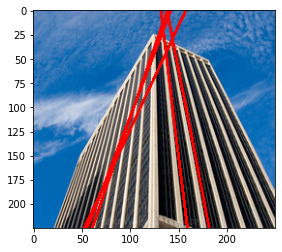

In [370]:
out = draw_lines(image, hough1, 150)
print(out.shape)
figure()
imshow(out, vmin=0, vmax=255)

max - 133
5


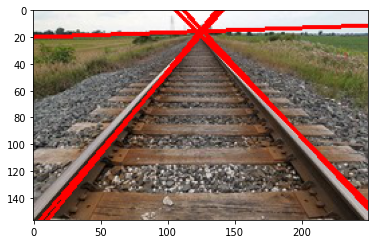

In [371]:
out2 = draw_lines(image2, hough2, 80)
figure()
imshow(out2, vmin=0, vmax=255)

# Окружности

In [414]:
def get_accumulator_circles(hyst):
  def build_G(sigma2):
    const1 = 2*sigma2
    const2 = 2*np.pi*sigma2

    G = np.zeros((3, 3, 3), dtype=np.float64)

    for x in range(3):
      for y in range(3):
        for z in range(3):
          G[x, y, z] = np.power(np.e, -((x-1)**2 + (y-1)**2 + (z-1)**2)/const1)/const2

    G /= np.sum(G)
    #print(G)
    return G   


  def Gaussian_filtering(arr, sigma2):
    G = build_G(sigma2)

    s0 = arr.shape[0]
    s1 = arr.shape[1]
    s2 = arr.shape[2]

    gauss = np.zeros((s0, s1, s2), dtype=int)
    arrCopy = np.zeros((s0+2, s1+2, s2+2), dtype=int)
    arrCopy[1:s0+1, 1:s1+1, 1:s2+1] = arr[:, :, :]

    for x in range(1, s0+1):
        for y in range(1, s1+1):
          for z in range(1, s2+1):
            #print(arrCopy[x-1:x+2, y-1:y+2, z-1:z+2].shape)
            gauss[x-1, y-1, z-1] = np.sum(G * arrCopy[x-1:x+2, y-1:y+2, z-1:z+2])
    
    return gauss


  def non_maximum_suppression(hough):
    a, b, R = hough.shape

    for x in range(a):
      for y in range(b):
        for z in range(R):
          z1 = max(z-1, 0)
          z2 = min(z+1, R-1)
          y1 = max(y-1, 0)
          y2 = min(y+1, b-1)
          x1 = max(x-1, 0)
          x2 = min(x+1, a-1)
          if np.max(hough[x1:x2+1, y1:y2+1, z1:z2+1]) == hough[x,y,z] and hough[x,y,z] != 0:
            pass
          else:
            hough[x,y,z] = 0

    return hough

  def delete_around(hough):
    a, b, R = hough.shape

    for x in range(a):
      for y in range(b):
        for z in range(R):
          z1 = max(z-1, 0)
          z2 = min(z+1, R-1)
          y1 = max(y-1, 0)
          y2 = min(y+1, b-1)
          x1 = max(x-1, 0)
          x2 = min(x+1, a-1)

          local_max = np.max(hough[x1:x2+1, y1:y2+1, z1:z2+1])
          if local_max > 0:
            index = np.argwhere(hough[x1:x2+1, y1:y2+1, z1:z2+1] == local_max)
            hough[x1:x2+1, y1:y2+1, z1:z2+1] = 0
            x3, y3, z3 = index[0] + [x, y, z] - 5
            hough[x3,y3,z3] = local_max

    return hough

  w = hyst.shape[0]
  h = hyst.shape[1]

  R_max = min(w, h) // 2
  hough = np.zeros((w, h, R_max), dtype=int)
 
  ind = np.argwhere(hyst[:, :] > 0)

  for i in range(0, ind.shape[0], int(1//0.2)+1):
    x, y = ind[i]
    print(x, y)
    for a in range(w):
      for b in range(h):
        R = int(np.sqrt((x-a)**2 + (y-b)**2))
        if R < R_max:
          #print('x, y -', x, y, "a, b, R -", a, b, R)
          hough[a, b, R] += 1
  print(1)
  hough = Gaussian_filtering(hough, 100)
  print(2)
  hough = non_maximum_suppression(hough)
  print(3)
  #hough = delete_around(delete_around(hough))
  #print(4)

  return hough

In [415]:
hough3 = get_accumulator_circles(hyst3)
print(hough3.max())

1 1
1 9
1 25
1 32
1 55
1 63
1 69
1 75
1 81
1 88
1 94
1 100
1 105
1 114
1 127
1 133
1 147
1 155
1 172
1 188
1 193
1 200
1 207
1 212
1 220
1 225
1 230
1 235
1 240
1 246
2 8
2 23
2 32
2 55
2 62
2 70
2 77
2 82
2 90
2 96
2 103
2 114
2 129
2 139
2 146
2 154
2 170
2 186
2 195
2 201
2 206
2 211
2 218
2 224
2 229
2 235
2 241
3 1
5 84
5 212
5 217
6 78
6 83
6 88
6 208
6 213
6 218
6 248
7 77
7 82
7 88
7 203
7 208
7 213
7 219
7 224
8 73
8 78
8 199
8 204
8 223
8 248
9 73
9 197
9 202
9 229
10 72
10 197
10 228
11 68
11 98
11 230
12 67
12 193
12 231
13 65
13 100
13 232
14 2
14 100
14 194
15 2
15 101
15 193
16 2
16 101
16 191
16 248
17 97
17 191
18 1
18 64
18 189
18 248
19 63
19 105
19 239
20 62
20 187
20 241
21 99
21 186
21 242
22 62
22 185
22 242
23 62
23 186
23 248
24 105
24 242
25 2
25 106
25 242
26 2
26 105
26 186
27 1
27 61
27 185
27 248
28 107
28 243
29 59
29 184
29 248
30 101
30 184
31 58
31 105
31 185
32 1
32 61
32 182
32 245
33 60
33 107
33 245
34 59
34 106
34 245
35 61
35 182
35 248
36 105
36

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [416]:
print(hough3.max())

24


In [417]:
def draw_circles(image, hough, sigma):
  w, h, _= image.shape
  s0, s1, s2 = hough.shape

  lines = []
  out = image.copy()

  for a in range(s0):
    for b in range(s1):
      for R in range(s2):
        if hough[a, b, R] > sigma:
          lines.append([a, b, R])
  
  print(len(lines))
  for x in range(w):
    for y in range(h):
      for a, b, R in lines:
        val = int(np.sqrt((x-a)**2 + (y-b)**2))
        if R == val or R == val-1 or R == val+1:
          out[x, y] = [255, 0, 0]
          break

  return out

5


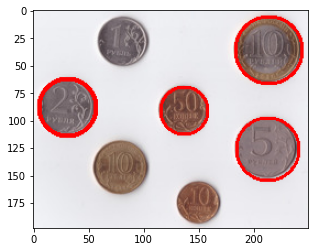

In [423]:
out3 = draw_circles(image3, hough3, 17)
figure()
imshow(out3, vmin=0, vmax=255)